# Probabilidade e estatística
## Exercício 2 - Goblin

O exercício objetiva o entendimento do processo de amostragem, visualizando como seus valores variam em relação à população.

Primeiramente, criarei uma lista correspondentes às notas de usuários para o último episódio que assisti (Gintama ep. 50) no famoso site IMDB. As notas variam de 1 a 10, sendo 547 no total.

In [1]:
notas = [10] * 238 + [9] * 116 + [8] * 111 + [7] * 42 + [6] * 23 + [5] * 5 + [4] * 2 + [3] * 1 + [2] * 0 + [1] * 9

Considerando os usuários que votaram nesse episódio como a população, ou seja, a população são as 547 notas atribuídas, calculemos a média simples das notas do episódio.

In [2]:
import statistics as st

print(f'A média de notas da população é {st.mean(notas)}.')

A média de notas da população é 8.755027422303474.


Agora que temos a média da população, faremos 100 amostragens e calcularemos a média de cada uma delas, armazenando-as em uma lista. Faremos 2 amostragens para cada 25 + k, com k de 0 a 49.

In [3]:
from numpy.random import choice

média_amostragens = []
for k in range(50):
    for i in range(2):
        notas_amostra = choice(notas, 25+k, replace=False)
        notas_amostra = list(map(int, notas_amostra))
        média = st.mean(notas_amostra)
        média_amostragens.append(média)

In [4]:
print(f'Algumas das médias calculadas: {list(map(float, (choice(média_amostragens, 4))))}')

Algumas das médias calculadas: [8.68918918918919, 8.780821917808218, 8.974358974358974, 8.36111111111111]


Assim, foi criada a lista "média_amostragens", que contém a média das 100 amostragens feitas. Por fim, calcularemos a média e o desvio padrão dessa lista de médias de amostragens.

In [5]:
print(f'A média foi de {st.mean(média_amostragens)}.')
print(f'O desvio padrão foi de {st.pstdev(média_amostragens)}')

A média foi de 8.74259399174075.
O desvio padrão foi de 0.23511922875965244


### Discussões

Após calcularmos a média da população e a média das amostragens, percebemos serem bem próximas, aproximadamente 0.01 de diferença. Isso é interessante, pois ao observarmos algumas das médias calculadas, observamos ampla gama de valores, como 8.35 e 9.12, mas com muitas amostragens feitas, os resultados conseguem se aproximar bastante ao da população. Ao observarmos o desvio padrão, percebe-se ser baixo, apenas 0.25. Uma teoria para explicar esse baixo resultado pode ser devido à alta concentração das notas entre 8 e 10 (85% das notas), dificultando o aparecimento de valores que se distanciem muito da média para aumentar significativamente o desvio padrão. Isso faz com que as médias apresentem pequenas variabilidades, tornando casos mais extremos como os mencionados perderem força de distanciar a média. Façamos um boxplot para confirmar a teoria.

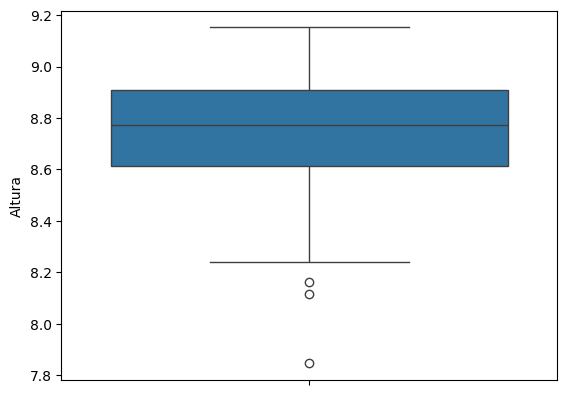

In [6]:
import seaborn as sns
eixo = sns.boxplot(y=média_amostragens)
eixo.set_ylabel("Altura");

Veja como, de fato, a distribuição das médias é próxima, explicando o baixo desvio padrão.

Por fim, podemos aplicar nesse contexto a Lei dos Grandes Números, que basicamente aponta que quanto maior for a amostra e o número de amostragens, mais próxima ela tende a ficar de representar fielmente a população. Assim, usando valores grandes, chegando a 74% da população e 100 amostragens, as médias realmente tenderiam a se aproximar bastante da média da população, como ocorreu.

Além disso, percebe-se o Teorema Central do Limite, em que as médias das amostragens tendem a uma distribuição normal com centro na média da população. Isso foi visto com facilidade no boxplot, em que a mediana é 8.74, com primeiro quartil 8.57 e terceiro quartil 8.93. De acordo com o teorema, quanto maior o número de amostragens, melhor fica a observação da distribuição normal, assim, tendo feito com 100 amostragens, é perceptível sua formação.

Referências:

IMDb. “Gintama” Mitei ha mitei de atte kettei de ha nai. [S.l.], 2007. Disponível em: IMDb. Acesso em: 9 ago. 2025.

MINITAB. O teorema do limite central: as médias de amostras grandes e aleatórias são aproximadamente normais. [S.l.], [s.d.]. Disponível em: support.minitab.com. Acesso em: 9 ago. 2025.

DATACAMP. Lei dos grandes números: Definição, exemplos e casos de uso. [S.l.], 5 jun. 2025. Disponível em: DataCamp. Acesso em: 9 ago. 2025.